In [1]:
# https://github.com/CDDLeiden/DrugEx
# https://zenodo.org/record/7096859

In [2]:
from drugex.training.models import RNN
from drugex.data.corpus.vocabulary import VocSmiles

GPUS = [0] # change this to match the number of GPUs you have

voc = VocSmiles.fromFile("data/drugex/models/pretrained/DrugEx_v2_PT_Papyrus05.5/Papyrus05.5_smiles_rnn_PT.vocab")
pretrained = RNN(voc, is_lstm=True, use_gpus=GPUS)
pretrained.loadStatesFromFile('data/drugex/models/pretrained/DrugEx_v2_PT_Papyrus05.5/Papyrus05.5_smiles_rnn_PT.pkg')

In [3]:
from drugex.utils import canonicalize_list
from drugex.training.scorers.smiles import SmilesChecker
import numpy as np

def sample_smiles(self, num_smiles, batch_size=100, drop_duplicates=True, drop_invalid=True):
    smiles = []
    while len(smiles) < num_smiles:
        # sample SMILES
        sequences = self.sample(batch_size)
        # decode according to vocabulary
        new_smiles = canonicalize_list([self.voc.decode(s, is_tk = False) for s in sequences])
        # drop duplicates
        if drop_duplicates:
            new_smiles = np.array(new_smiles)
            new_smiles = new_smiles[np.logical_not(np.isin(new_smiles, smiles))]
            new_smiles = new_smiles.tolist()
        # drop invalid smiles
        if drop_invalid:
            scores = SmilesChecker.checkSmiles(new_smiles, frags=None).ravel()
            new_smiles = np.array(new_smiles)[scores > 0].tolist()
        smiles += new_smiles
    return smiles[:num_smiles]

smiles_pretrained = sample_smiles(pretrained, 1000)
print(smiles_pretrained[0:10])

['CC(C)(O)C(F)CNC(=O)c1cnc(-n2ccc3cc(C#N)cnc32)cc1NC1CC1', 'CC1(C(=O)Nc2ccc3cc4ccccc4cc3c2)CCN1C(=O)Cc1ccc(Cl)cc1Cl', 'NC(=O)c1nn(-c2ccc(S(N)(=O)=O)cc2)c2c1CCc1ccc(NC(=O)c3ccc[nH]3)cc1-2', 'COc1cc(C)c(Cl)cc1S(=O)(=O)N1CCCCC1', 'COc1ccc(C=C2SC(Nc3nc4ccccc4s3)=NC2=O)c(OC)c1', 'Cc1cc[n+](Cc2ccc([N+](=O)[O-])cc2)cc1', 'CC(C(=O)NCc1ccc(C(F)(F)F)nc1SCCCN1CCCCC1)c1ccc(NS(C)(=O)=O)c(F)c1', 'CC1CCCC(N2CCC(c3c(F)ccc(Cl)c3F)=CC2=O)c2cc(ccn2)-c2ccc(N)cc2CO1', 'O=C(CN1C(=O)c2ccccc2C1=O)Nc1ccccc1C(F)(F)F', 'CCN1CCN(C(=O)CN2CCC(C(=O)NC3CCN(Cc4ccccc4)CC3)CC2=O)CC1']


,SMILES,RDMol
0,CC(C)(O)C(F)CNC(=O)c1cnc(-n2ccc3cc(C#N)cnc32)c...,

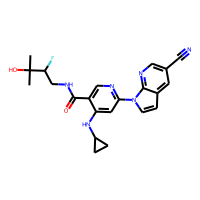

In [4]:
from scaffviz.data.dataset import DataSetSMILES

dataset = DataSetSMILES("data/pretrained_sampled.tsv", smiles=smiles_pretrained, use_existing=False)
dataset.asDataFrame().head(1)

In [5]:
from scaffviz.depiction.plot import Plot
from scaffviz.clustering.manifold import TSNE
from scaffviz.clustering.descriptors import MorganFP

dataset.addDescriptors([MorganFP(radius=2, nBits=1024)], recalculate=False) 

# make an interactive plot that will use t-SNE to embed the data set in 2D (all current descriptors in the data set will be used)
plt = Plot(dataset, TSNE())

# start the server, you can open the plot in the browser
plt.plot(
    recalculate=False,
    viewport_height=800,
    port=9292
)

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
import pandas as pd

df_a2a = pd.read_table('data/A2A_LIGANDS.tsv')
df_a2a

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Descriptor_MorganFP_1016,Descriptor_MorganFP_1017,Descriptor_MorganFP_1018,Descriptor_MorganFP_1019,Descriptor_MorganFP_1020,Descriptor_MorganFP_1021,Descriptor_MorganFP_1022,Descriptor_MorganFP_1023,TSNE_1,TSNE_2
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL30,CHEMBL410234,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.262220,-18.827414
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL30,CHEMBL601208,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.326859,6.892628
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL30,CHEMBL473650,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.112610,-4.832593
3,AAJLGNFYNMJGSY_on_P29274_WT,High,ExCAPE-DB,9586623,NC(=NC(=O)Cn1c(O)c2CCCCc2c1O)Nc1nc2c(cccc2)s1,AAJLGNFYNMJGSY,AAJLGNFYNMJGSY-UHFFFAOYSA-N,InChI=1S/C18H19N5O3S/c19-17(22-18-20-12-7-3-4-...,"""AuxInfo=1/1/N:12,13,25,24,11,14,26,23,6,10,15...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.665638,-12.843870
4,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL30,CHEMBL573125;45483959;CHEMBL573125;45483959;CH...,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.994354,38.663483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL30,CHEMBL4283826,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.856173,-70.698350
3987,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL30,CHEMBL260989;10132473;CHEMBL260989;10132473;CH...,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.900303,-42.615310
3988,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL30,CHEMBL600404,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.871733,13.171981
3989,ZZMIPZLRKFEGIA_on_P29274_WT,High,ChEMBL30,CHEMBL2312988;71563052;CHEMBL2312988;71563052;...,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.046997,12.641930


In [7]:
smiles_train = df_a2a.SMILES
smiles_train

0       Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...
1       Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...
2        O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1
3           NC(=NC(=O)Cn1c(O)c2CCCCc2c1O)Nc1nc2c(cccc2)s1
4       CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...
                              ...                        
3986       CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12
3987           Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1
3988                Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1
3989        CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1
3990             CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12
Name: SMILES, Length: 3991, dtype: object

In [8]:
from drugex.data.processing import Standardization

N_PROCESSES = 12
CHUNK_SIZE = 1000

standardizer = Standardization(n_proc=N_PROCESSES, chunk_size=CHUNK_SIZE)
smiles_train = standardizer.apply(smiles_train)
smiles_train[0:10]

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

['Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)n1',
 'Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2nc3c(cc12)CCCC3',
 'O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1',
 'NC(=NC(=O)Cn1c(O)c2c(c1O)CCCC2)Nc1nc2ccccc2s1',
 'CNC(=O)C12CC1C(n1cnc3c(NCc4cccc(Cl)c4)nc(C#CCCCCC(=O)OC)nc31)C(O)C2O',
 'Cn1c(-n2nccn2)nc2c(N)nc(CCc3ccccc3)nc21',
 'Nc1nc(-c2ccccc2)cn2cc(-c3ccco3)nc12',
 'CCCn1c(=O)c2c(nc3n2CCCN3c2ccc(OCCN3CCCC3)cc2)n(CCC)c1=O',
 'N#Cc1c(-c2ccccc2)cc(-c2ccco2)nc1N',
 'CCCn1c(=O)c2nc(-c3ccccc3)[nH]c2n(CCCOC)c1=O']

In [9]:
from drugex.data.processing import CorpusEncoder, RandomTrainTestSplitter
from drugex.data.corpus.corpus import SequenceCorpus
from drugex.data.datasets import SmilesDataSet
import os

DATA_DIR = "data/drugex/sets/"
os.makedirs(DATA_DIR, exist_ok=True)

voc = VocSmiles.fromFile("data/drugex/models/pretrained/DrugEx_v2_PT_Papyrus05.5/Papyrus05.5_smiles_rnn_PT.vocab")
encoder = CorpusEncoder(
    SequenceCorpus,
    {
        'vocabulary': voc,
        'update_voc': False,
        'throw': True

    },
    n_proc=N_PROCESSES,
    chunk_size=CHUNK_SIZE
)

data_collector = SmilesDataSet(os.path.join(DATA_DIR, 'ligand_corpus.tsv'), rewrite=True)
encoder.apply(smiles_train, collector=data_collector)

splitter = RandomTrainTestSplitter(0.1, 1e4)
train, test = splitter(data_collector.getData())
for df, name in zip([train, test], ['train', 'test']):
    df.to_csv(os.path.join(DATA_DIR, f'ligand_{name}.tsv'), header=True, index=False, sep='\t')

voc.toFile(os.path.join(DATA_DIR, 'ligand.vocab'))

SequenceCorpus (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Molecule does not meet min/max words requirements (min: 10, max: 100). Words found: {'6', '7', '1', '(', 'N', '[N+]', 'o', '4', 'n', '[B-]', 's', 'C', '=', ')', 'O', '5', 'EOS', '3', '-', 'F', 'c', '2'} (occurrence count: 126). It will be ignored.
Molecule does not meet min/max words requirements (min: 10, max: 100). Words found: {'O', 'C', '1', '=', '4', '(', '5', '3', 'EOS', 'N', 'n', ')', 'c', '2'} (occurrence count: 107). It will be ignored.
Molecule does not meet min/max words requirements (min: 10, max: 100). Words found: {'6', '7', '1', '(', 'N', 'o', '4', 'n', 'S', 'C', '=', ')', 'O', '5', 'EOS', '3', '-', 'c', '2'} (occurrence count: 128). It will be ignored.
Molecule does not meet min/max words requirements (min: 10, max: 100). Words found: {'6', '7', '1', '(', 'N', '[N+]', 'o', '4', 'n', 'C', '=', ')', 'O', '5', 'EOS', '3', '-', 'c', '2'} (occurrence count: 114). It will be ignored.
Molecule does not meet min/max words requirements (min: 10, max: 100). Words found: {'O', 'C'

In [10]:
BATCH_SIZE = 256

data_set_train = SmilesDataSet(os.path.join(DATA_DIR, 'ligand_train.tsv'), voc=voc)
data_set_train.voc = voc
train_loader = data_set_train.asDataLoader(batch_size=BATCH_SIZE)

data_set_test = SmilesDataSet(os.path.join(DATA_DIR, 'ligand_test.tsv'), voc=voc)
data_set_test.voc = voc
valid_loader = data_set_test.asDataLoader(batch_size=BATCH_SIZE)

In [11]:
from drugex.training.monitors import FileMonitor

EPOCHS = 50
MODEL_DIR = "data/drugex/models/finetuned/"

ft_path = os.path.join(MODEL_DIR, 'ligand_finetune')
finetuned = RNN(voc, is_lstm=True, use_gpus=GPUS)
finetuned.loadStatesFromFile('data/drugex/models/pretrained/DrugEx_v2_PT_Papyrus05.5/Papyrus05.5_smiles_rnn_PT.pkg')
monitor = FileMonitor(ft_path, verbose=True)
finetuned.fit(train_loader, valid_loader, epochs=EPOCHS, monitor=monitor, patience=10)

voc.toFile(os.path.join(MODEL_DIR, 'finetune.vocab'))

In [12]:
df_info = pd.read_csv('data/drugex/models/finetuned/ligand_finetune_fit.tsv', sep='\t')
df_info.head()

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss
0,1,0.152064,0.149214,0.913934,NaN,NaN,NaN
1,2,0.128081,0.142791,0.942623,NaN,NaN,NaN
2,3,0.114477,0.140908,0.971193,NaN,NaN,NaN
3,4,0.107636,0.140044,0.970833,NaN,NaN,NaN
4,5,0.104233,0.141259,0.946502,NaN,NaN,NaN


<AxesSubplot: >

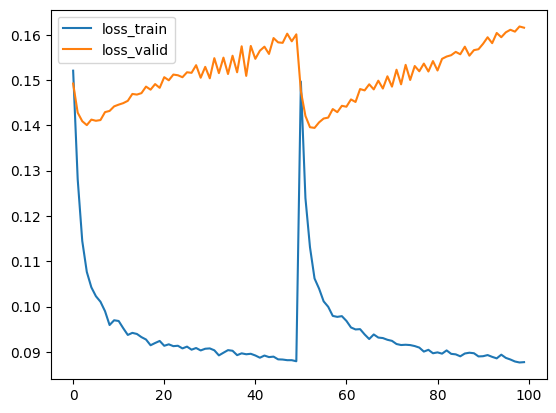

In [13]:
df_info[['loss_train', 'loss_valid']].plot.line()

In [14]:
finetuned.loadStatesFromFile('data/drugex/models/finetuned/ligand_finetune.pkg')

smiles_finetuned = sample_smiles(finetuned, 1000)
dataset = DataSetSMILES("data/finetuned_sampled.tsv", smiles=smiles_finetuned, use_existing=False)
dataset

In [15]:
from scaffviz.depiction.plot import Plot
from scaffviz.clustering.manifold import TSNE
from scaffviz.clustering.descriptors import MorganFP

dataset.addDescriptors([MorganFP(radius=2, nBits=1024)], recalculate=False) 

# make an interactive plot that will use t-SNE to embed the data set in 2D (all current descriptors in the data set will be used)
plt = Plot(dataset, TSNE())

# start the server, you can open the plot in the browser
plt.plot(
    recalculate=False,
    viewport_height=800,
    port=9393
)

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [16]:
import joblib

model = joblib.load('data/qsar/models/A2A_CLS_ET_250.pickle')
model

ExtraTreesClassifier(n_estimators=250)

In [17]:
from drugex.training.interfaces import Scorer

class ModelScorer(Scorer):
    
    def __init__(self, model, prefix, descriptor = MorganFP(radius=2, nBits=1024)):
        super().__init__()
        self.model = model
        self.prefix = prefix
        self.descriptor = descriptor
    
    def getScores(self, mols, frags=None):
        X = pd.Series(mols).apply(lambda x : pd.Series(self.descriptor(x) if x else [0] * 1024))
        preds = self.model.predict_proba(X)[::,1]
        return preds
    
    def getKey(self):
        return f"{self.prefix}_{type(self.model)}"



scorer_model = ModelScorer(model, 'A2A_CLS')
scorer_model

In [18]:
predictions = scorer_model([None] + list(smiles_finetuned))
predictions[0:10]

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names



array([0.186, 0.7  , 1.   , 0.682, 0.932, 0.   , 0.96 , 0.572, 0.896,
       0.32 ])

In [19]:
sum(predictions > 0.5) / len(predictions)

0.5194805194805194

In [20]:
from drugex.training.scorers.modifiers import ClippedScore, SmoothClippedScore

# active target
scorer_model.setModifier(ClippedScore(lower_x=0.2, upper_x=0.8))

<AxesSubplot: xlabel='Score', ylabel='Clipped Score'>

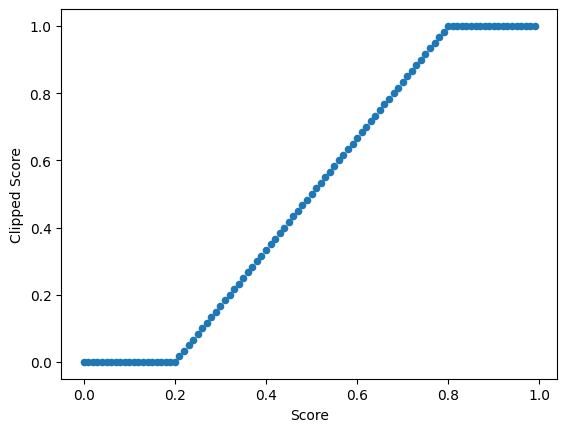

In [21]:
import numpy as np

def depict_modifier(modifier, start=0, end=1, step=0.01):
    vals = np.arange(start,end, step)
    scores = [(x, modifier(x)) for x in vals] # get the A1R modifier for inactivity (the lower the activity, the higher the reward)
    scores = pd.DataFrame(scores, columns=['Score', 'Clipped Score'])
    return scores.plot.scatter(x = 'Score', y = 'Clipped Score')

depict_modifier(scorer_model.getModifier())

In [22]:
from drugex.training.scorers.properties import Property
from drugex.training.scorers.modifiers import SmoothClippedScore

sascore = Property(
    "SA",
    modifier=SmoothClippedScore(lower_x=6, upper_x=3)
)

<AxesSubplot: xlabel='Score', ylabel='Clipped Score'>

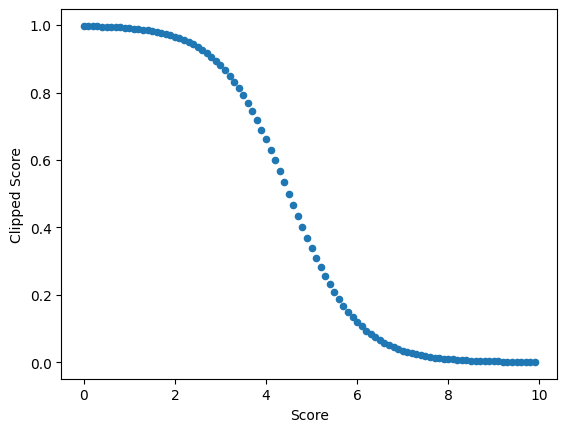

In [23]:
depict_modifier(sascore.getModifier(), 0, 10, 0.1)

In [24]:
from drugex.training.environment import DrugExEnvironment
from drugex.training.rewards import ParetoCrowdingDistance

scorers = [
    scorer_model,
    sascore
]
thresholds = [
    0.5,
    0.1
]

environment = DrugExEnvironment(scorers, thresholds, reward_scheme=ParetoCrowdingDistance())

In [25]:
environment.getScores(smiles_finetuned)

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names



,A2A_CLS_<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>,SA,DESIRE,VALID
0,0.833333,0.872962,1,1
1,1.000000,0.931695,1,1
2,0.803333,0.951500,1,1
3,1.000000,0.906433,1,1
4,0.000000,0.955998,0,1
...,...,...,...,...
995,0.846667,0.905904,1,1
996,1.000000,0.920248,1,1
997,1.000000,0.918549,1,1
998,1.000000,0.930176,1,1


In [26]:
from drugex.training.models.explorer import SmilesExplorerNoFrag

pretrained = RNN(voc, is_lstm=True, use_gpus=GPUS)
pretrained.loadStatesFromFile('data/drugex/models/pretrained/DrugEx_v2_PT_Papyrus05.5/Papyrus05.5_smiles_rnn_PT.pkg')

finetuned = RNN(voc, is_lstm=True, use_gpus=GPUS)
finetuned.loadStatesFromFile('data/drugex/models/finetuned/ligand_finetune.pkg')

explorer = SmilesExplorerNoFrag(
    finetuned,
    environment,
    mutate = pretrained,
    crover = finetuned,
    sigma = 0,
    epsilon = 0.01,
    use_gpus = GPUS
)
monitor = FileMonitor(os.path.join(MODEL_DIR, 'ligand_agent_rl'), verbose=True)
explorer.fit(train_loader, valid_loader, monitor=monitor, epochs=10)

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fi

In [27]:
df_info = pd.read_csv('data/drugex/models/finetuned/ligand_agent_rl_fit.tsv', sep='\t')
df_info.head()

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss
0,1,NaN,NaN,0.859375,NaN,NaN,-1.125704
1,2,NaN,NaN,0.835938,NaN,NaN,-0.092438
2,3,NaN,NaN,0.875000,NaN,NaN,-0.093063
3,4,NaN,NaN,0.921875,NaN,NaN,-0.087151
4,5,NaN,NaN,0.929688,NaN,NaN,-0.085320


<AxesSubplot: >

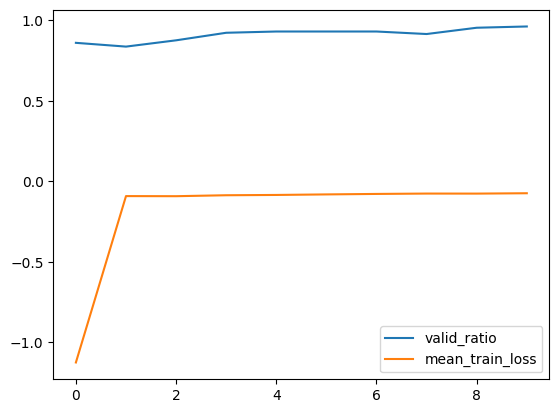

In [29]:
df_info[['valid_ratio', 'mean_train_loss']].plot.line()

In [30]:
agent = RNN(voc, is_lstm=True, use_gpus=GPUS)
agent.loadStatesFromFile('data/drugex/models/finetuned/ligand_agent_rl.pkg')

smiles = sample_smiles(agent, 1000)

In [35]:
scores = environment.getScores(smiles)
scores

/home/sichom/software/miniconda/envs/drugex-demo/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names



,A2A_CLS_<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>,SA,DESIRE,VALID
0,0.706667,0.959731,1,1
1,1.000000,0.939109,1,1
2,1.000000,0.947251,1,1
3,0.586667,0.955955,1,1
4,1.000000,0.965169,1,1
...,...,...,...,...
995,1.000000,0.949258,1,1
996,1.000000,0.937217,1,1
997,0.953333,0.927319,1,1
998,1.000000,0.949339,1,1


In [39]:
sum(scores["A2A_CLS_<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>"] > 0.5) / len(scores)

0.715

In [32]:
dataset = DataSetSMILES("data/finetuned_rl_sampled.tsv", smiles=smiles, use_existing=False)
dataset

In [40]:
dataset.addData('CLS', scores["A2A_CLS_<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>"])

In [43]:
dataset.addDescriptors([MorganFP(radius=2, nBits=1024)], recalculate=False) 

# make an interactive plot that will use t-SNE to embed the data set in 2D (all current descriptors in the data set will be used)
plt = Plot(dataset, TSNE())

# start the server, you can open the plot in the browser
plt.plot(
    recalculate=False,
    color_by='CLS',
    color_continuous_scale="rdylgn",
    color_style='continuous',
    viewport_height=800,
    port=9696
)